<h1> Etude des arbres de Grenoble <h1>

In [2]:
#####################  importer un fichier csv ####################################
import csv
liste_lignes = []
with open("/home/mathieu.vialat@Digital-Grenoble.local/Documents/Projet_arbres/data/ESP_PUBLIC.IDENTITE_ARBRE.csv", newline = '') as f:
    data = csv.reader(f)
    for lignes in data:
        liste_lignes.append(lignes)
print(len(liste_lignes))
print(liste_lignes[5])        

31619
['12182', 'ESP29289', 'ESP29289', 'VEG', 'VEGETATION', 'ESP01', 'Arbre', 'ESP174', "Arbre d'espaces ouverts", 'ESP1213', 'Pc 3 H St Ferjus Chartr Hermin', '2', 'AR29289', 'Acer', 'campestre', '', 'Arbre adulte', '', '', '1960', '', '', '', '', '', '', '', '', '', '', 'Ville de Grenoble', '{"type":"Point","coordinates":[5.73666558310418,45.1935582748671]}']


In [3]:
##################################### Affichage des premières lignes du fichier ###############################
print(liste_lignes[0], '\n', liste_lignes[1]) 
# liste 0: en tête des colonnes
# liste 1: valeur pour chaque colonne pour le premier arbre

['\ufeffELEM_POINT_ID', 'CODE', 'NOM', 'GENRE', 'GENRE_DESC', 'CATEGORIE', 'CATEGORIE_DESC', 'SOUS_CATEGORIE', 'SOUS_CATEGORIE_DESC', 'CODE_PARENT', 'CODE_PARENT_DESC', 'ADR_SECTEUR', 'BIEN_REFERENCE', 'GENRE_BOTA', 'ESPECE', 'VARIETE', 'STADEDEDEVELOPPEMENT', 'EQUIPE', 'REMARQUES', 'ANNEEDEPLANTATION', 'RAISONDEPLANTATION', 'TRAITEMENTCHENILLES', 'COURRIER', 'IDENTIFIANTPLU', 'TYPEIMPLANTATIONPLU', 'INTITULEPROTECTIONPLU', 'ANNEEABATTAGE', 'ESSOUCHEMENT', 'DIAMETREARBRE', 'CAUSEABATTAGE', 'COLLECTIVITE', 'GeoJSON'] 
 ['23881', 'ESP29285', 'ESP29285', 'VEG', 'VEGETATION', 'ESP01', 'Arbre', 'ESP174', "Arbre d'espaces ouverts", 'ESP639', 'Cité Moyrand E Cartan le mail ', '5', 'AR29285', 'Platanus', 'hispanica', '', 'Arbre adulte', '', '', '1977', '', '', '', '170', 'Alignement', 'L 123-1.7', '', '', '', '', 'Ville de Grenoble', '{"type":"Point","coordinates":[5.74362721776614,45.1799034026163]}']


In [4]:
print(liste_lignes[0][1], '\n', liste_lignes[1][1])

CODE 
 ESP29285


In [5]:
############################################ Extraire l'année de plantation de chaque arbre ####################
# année de plantation: colonne 19
liste_annee_plantation = []
for ind in range(1, len(liste_lignes)):
    liste_annee_plantation.append(liste_lignes[ind][19])
print(len(liste_annee_plantation))    
print(liste_annee_plantation[5])

31618
1960


In [6]:
####### Afficher les 50 premières lignes et les 50 dernières de la liste des années de plantation
print(liste_annee_plantation[:50:])
print(liste_annee_plantation[len(liste_annee_plantation)-50::])

['1977', '2001', '1975', '1978', '1960', '1960', '2000', '1944', '1944', '1991', '2012', '1980', '1992', '1982', '1986', '1977', '2004', '2004', '1965', '1965', '1991', '1960', '1924', '2004', '1960', '1960', '1982', '1990', '2010', '1999', '1998', '1975', '1975', '2001', '2001', '2001', '1965', '1965', '1979', '1960', '1978', '1978', '2006', '1975', '1975', '2001', '2001', '1994', '1995', '1995']
['2001', '2012', '2000', '1966', '2006', '2002', '1967', '1996', '1977', '1977', '1977', '1997', '1984', '1984', '1984', '1984', '1996', '1984', '1984', '1984', '1977', '1977', '1977', '1960', '1960', '1996', '2000', '1981', '1976', '2002', '1970', '1970', '1970', '1970', '1970', '1970', '1970', '1970', '2014', '2014', '2014', '2014', '2014', '2014', '2014', '2014', '2014', '2014', '2014', '2014']


In [7]:
############################### combien d'arbres sont recensés dans ce jeu de données
print("Il y a", len(liste_annee_plantation), "arbres recensés dans ce fichier")

Il y a 31618 arbres recensés dans ce fichier


In [38]:
############################## nombre d'arbres avec une année de plantation inconnue
def nb_arbres_annee(liste, annee):
    cmpt_arbre = 0
    for arbre in liste:
        if(arbre == annee):
            cmpt_arbre+=1 
    return cmpt_arbre

In [39]:
nb_arbres_inc = liste_annee_plantation.count("")
print(nb_arbres_inc)
nb_arbres_inc_func = nb_arbres_annee(liste_annee_plantation, "")
print(nb_arbres_inc_func)

1438
1438


In [40]:
############################### Nombre d'arbres plantés l'année de ma naissance
nb_arbres_naissance = nb_arbres_annee(liste_annee_plantation, "1995")
print(nb_arbres_naissance)

737


In [18]:
##################################### Plus ancienne et plus récente plantation
def min_max_annee(liste):
    annee_min_plant = 2022
    annee_max_plant = 0
    for annee in liste:
        if (annee != "" and int(annee) < int(annee_min_plant)):
            annee_min_plant = annee
        if (annee != "" and int(annee) > int(annee_max_plant)):
            annee_max_plant = annee
    return annee_max_plant, annee_min_plant

In [20]:
annee_max, annee_min = min_max_annee(liste_annee_plantation)  
#annee_min_plant = min(liste_annee_plantation)
annee_max_plant = max(liste_annee_plantation)

print("Les arbres recensés ont été plantés entre", annee_min, "et", annee_max)

Les arbres recensés ont été plantés entre 1900 et 2021


In [21]:
######################### Nombre d'arbres plantés par année
liste_annees = range(1900, 2022)
liste_nb_arbres = []
for annee in liste_annees:
    #if (liste_annee_plantation.count(str(annee))!=0):
    liste_nb_arbres.append(liste_annee_plantation.count(str(annee)))
    print(annee, ":", liste_annee_plantation.count(str(annee)))
print(liste_nb_arbres)

1900 : 4
1901 : 0
1902 : 0
1903 : 0
1904 : 0
1905 : 0
1906 : 0
1907 : 0
1908 : 0
1909 : 0
1910 : 0
1911 : 0
1912 : 0
1913 : 0
1914 : 0
1915 : 0
1916 : 0
1917 : 0
1918 : 0
1919 : 0
1920 : 0
1921 : 0
1922 : 0
1923 : 0
1924 : 11
1925 : 0
1926 : 0
1927 : 0
1928 : 0
1929 : 0
1930 : 0
1931 : 0
1932 : 0
1933 : 0
1934 : 0
1935 : 0
1936 : 0
1937 : 0
1938 : 0
1939 : 0
1940 : 0
1941 : 0
1942 : 0
1943 : 0
1944 : 27
1945 : 0
1946 : 0
1947 : 0
1948 : 0
1949 : 0
1950 : 402
1951 : 0
1952 : 0
1953 : 0
1954 : 0
1955 : 118
1956 : 0
1957 : 0
1958 : 0
1959 : 16
1960 : 701
1961 : 0
1962 : 0
1963 : 0
1964 : 6
1965 : 734
1966 : 85
1967 : 53
1968 : 111
1969 : 314
1970 : 1366
1971 : 67
1972 : 318
1973 : 33
1974 : 287
1975 : 3631
1976 : 898
1977 : 602
1978 : 847
1979 : 324
1980 : 1445
1981 : 600
1982 : 359
1983 : 295
1984 : 647
1985 : 870
1986 : 221
1987 : 701
1988 : 235
1989 : 299
1990 : 248
1991 : 140
1992 : 221
1993 : 135
1994 : 252
1995 : 737
1996 : 363
1997 : 231
1998 : 205
1999 : 564
2000 : 427
2001 : 1488

In [23]:
############################## moyenne d'arbre plantés par année
from functools import reduce
def Average(liste):
    return reduce(lambda a, b: a+b, liste) / len(liste)

In [25]:
moyenne_arbre_annee = sum(liste_nb_arbres) / len(liste_nb_arbres)
moyenne_arbre_annee2 = Average(liste_nb_arbres)

print("La moyenne d'arbres plantés par années est de", round(moyenne_arbre_annee,2))

La moyenne d'arbres plantés par années est de 247.38


In [26]:
########################### stockage annee et nombre arbres dans un tuple puis créer une liste avec toutes les années
liste_annee_nb_arbres = []
for ind in range(len(liste_annees)):
    liste_annee_nb_arbres.append((liste_annees[ind], liste_nb_arbres[ind]))
print(liste_annee_nb_arbres)
print(len(liste_annee_nb_arbres))

[(1900, 4), (1901, 0), (1902, 0), (1903, 0), (1904, 0), (1905, 0), (1906, 0), (1907, 0), (1908, 0), (1909, 0), (1910, 0), (1911, 0), (1912, 0), (1913, 0), (1914, 0), (1915, 0), (1916, 0), (1917, 0), (1918, 0), (1919, 0), (1920, 0), (1921, 0), (1922, 0), (1923, 0), (1924, 11), (1925, 0), (1926, 0), (1927, 0), (1928, 0), (1929, 0), (1930, 0), (1931, 0), (1932, 0), (1933, 0), (1934, 0), (1935, 0), (1936, 0), (1937, 0), (1938, 0), (1939, 0), (1940, 0), (1941, 0), (1942, 0), (1943, 0), (1944, 27), (1945, 0), (1946, 0), (1947, 0), (1948, 0), (1949, 0), (1950, 402), (1951, 0), (1952, 0), (1953, 0), (1954, 0), (1955, 118), (1956, 0), (1957, 0), (1958, 0), (1959, 16), (1960, 701), (1961, 0), (1962, 0), (1963, 0), (1964, 6), (1965, 734), (1966, 85), (1967, 53), (1968, 111), (1969, 314), (1970, 1366), (1971, 67), (1972, 318), (1973, 33), (1974, 287), (1975, 3631), (1976, 898), (1977, 602), (1978, 847), (1979, 324), (1980, 1445), (1981, 600), (1982, 359), (1983, 295), (1984, 647), (1985, 870), (19

In [91]:
l = [1,1,2,3,1,5]
s = set(l)
s

{1, 2, 3, 5}

In [93]:
2 in s

True

In [28]:
########################### Quel maire de Grenoble a planté le plus d'arbres 
liste_maire = ["Jay", "Rivail", "Viallet", "Cornier", "Mistral", "Martin", "Cocat", "Lafleur", "martin", "Bally", "Perinetti", "Martin", "Michallon", "Dubedout", "Carignon", "Destot", "Piolle"]
annee_maire = [1904, 1908, 1910, 1919, 1932, 1935, 1944, 1945, 1947, 1948, 1949, 1959, 1965, 1983,1995,2014,2021]
print(len(liste_maire), len(annee_maire))

17 17


In [32]:
ind=0
liste_nb_arbres_maires = []
arbre_max = 0
nom_maire = ""
for index_maire, periode in enumerate(annee_maire):
    somme_arbre = 0
    #print(ind)
    while(ind < len(liste_annee_nb_arbres) and liste_annee_nb_arbres[ind][0]<= periode):
        somme_arbre += liste_annee_nb_arbres[ind][1]
        ind+=1
    if (somme_arbre > arbre_max):
        arbre_max = somme_arbre
        nom_maire = liste_maire[index_maire]
    liste_nb_arbres_maires.append((liste_maire[index_maire], somme_arbre))
#print(liste_nb_arbres_maires)
print("Le maire ayant planté le plus d'arbres est", nom_maire, "avec", arbre_max, "arbres")

Le maire ayant planté le plus d'arbres est Dubedout avec 11635 arbres


In [33]:
########################### Verification nombre d'arbres
total_arbres = 0
for t in liste_nb_arbres_maires:
    total_arbres += t[1]

print(total_arbres, len(liste_annee_plantation) - nb_arbres_inc)

30180 30180


In [34]:
######################### Stockage genre botanique avec annee 
# genre botanique: colonne 13
liste_genre_bota = []
for ind in range(1, len(liste_lignes)):
    liste_genre_bota.append((liste_lignes[ind][19], liste_lignes[ind][13]))
print(len(liste_genre_bota))    
print(liste_genre_bota[5])
#print(liste_genre_bota)

31618
('1960', 'Platanus')


In [41]:
########################## Nombre d'arbres dont l'info genre botanique est inconnue
nb_arbre_bota_inc = 0
for arbre in liste_genre_bota:
    if(arbre[1] == ""):
        nb_arbre_bota_inc+=1
print(nb_arbre_bota_inc)

933


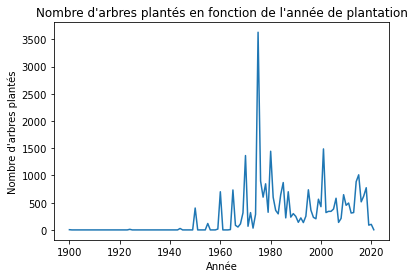

In [42]:
import matplotlib.pyplot as plt
x = liste_annees
y = liste_nb_arbres
plt.plot(x,y)
plt.xlabel("Année")
plt.ylabel("Nombre d'arbres plantés")
plt.title("Nombre d'arbres plantés en fonction de l'année de plantation")
plt.show()

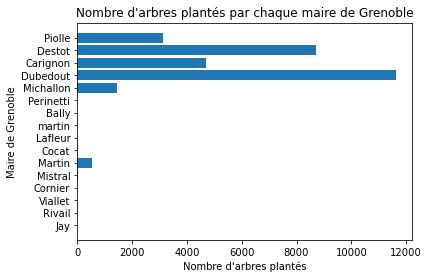

In [43]:
liste_nb_arbres_seul_maires = []
for t in liste_nb_arbres_maires:
    liste_nb_arbres_seul_maires.append(t[1])
    
x_maire = liste_maire
y_maire = liste_nb_arbres_seul_maires
plt.barh(x_maire,y_maire)
plt.ylabel("Maire de Grenoble")
plt.xlabel("Nombre d'arbres plantés")
plt.title("Nombre d'arbres plantés par chaque maire de Grenoble")
plt.show()

In [48]:
################# Triez les tuples (année, genre_botanique) en fonction de l'année de plantation (ordre décroissant)
liste_genre_bota_desc_order = []
for annee in range(2021,1899, -1):
    for ind in range(len(liste_genre_bota)):
        #print(int(liste_genre_bota[ind][0]), annee)
        if(liste_genre_bota[ind][0] == str(annee)):
            liste_genre_bota_desc_order.append(liste_genre_bota[ind])
            
print(liste_genre_bota_desc_order[0], liste_genre_bota_desc_order[-1])

('2021', 'Thuja') ('1900', 'Prunus')


In [56]:
################# Triez les tuples (année, genre_botanique) en fonction de l'année de plantation (ordre décroissant) optimisé
liste_genre_bota_desc_order = [tup for annee in range(2021,1899, -1) for tup in liste_genre_bota if tup[0] == str(annee)]
            
print(liste_genre_bota_desc_order[0], liste_genre_bota_desc_order[-1], len(liste_genre_bota_desc_order))

('2021', 'Thuja') ('1900', 'Prunus') 30180
